In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import io
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse
import pydaymet as daymet
 
coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
from shapely.geometry import Polygon
# mpl.use('agg')
# mpl.rcParams['savefig.pad_inches'] = 0


# I have manually processed every file using this format

In [2]:
target_limit =  "limits_4326" 
xmin, xmax, ymin, ymax = (coords[target_limit]["xmin"]), (coords[target_limit]["xmax"]), (coords[target_limit]["ymin"]), (coords[target_limit]["ymax"])

In [9]:
from scipy.ndimage import rotate

In [3]:
poly = Polygon([[xmin, ymin], [xmin, ymax], [xmax, ymax], [xmax, ymin]])

In [4]:
var = ["prcp", "tmin"]
dates = ("2000-01-01", "2000-01-01")

monthly = daymet.get_bygeom(poly, dates, variables=var)

In [12]:
arr = np.nan_to_num(monthly["tmin"].to_numpy()[0], nan=-99)

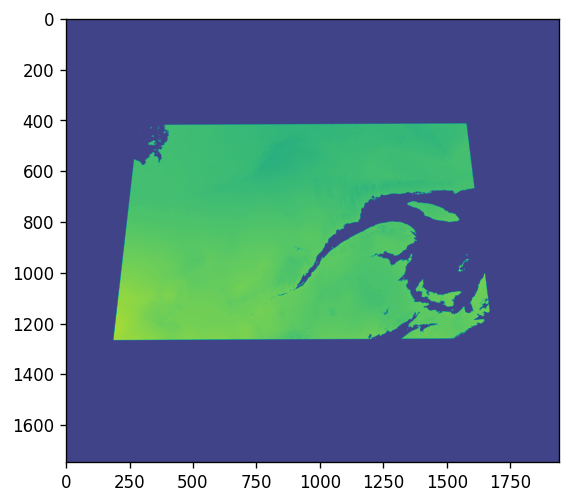

In [13]:
plt.imshow(rotate(arr, -20, cval=-99))

In [18]:
monthly.

<xarray.Dataset>
Dimensions:                  (time: 1, y: 1276, x: 1601)
Coordinates:
  * time                     (time) datetime64[ns] 2000-01-01
  * y                        (y) float32 1.672e+03 1.671e+03 ... 398.0 397.0
  * x                        (x) float32 1.273e+03 1.274e+03 ... 2.873e+03
    lambert_conformal_conic  int32 0
Data variables:
    prcp                     (time, y, x) float32 nan nan nan ... nan nan nan
    lat                      (y, x) float64 nan nan nan nan ... nan nan nan nan
    lon                      (y, x) float64 nan nan nan nan ... nan nan nan nan
    tmin                     (time, y, x) float32 nan nan nan ... nan nan nan
Attributes:
    start_year:          2000
    source:              Daymet Software Version 4.0
    Version_software:    Daymet Software Version 4.0
    Version_data:        Daymet Data Version 4.0
    Conventions:         CF-1.6
    citation:            Please see http://daymet.ornl.gov/ for current Dayme...
    references:          Please see http://daymet.ornl.gov/ for current infor...
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  40.20015331020034
    geospatial_lat_max:  56.614304803468016
    geospatial_lon_min:  -82.97732871568562
    geospatial_lon_max:  -55.485097675317974

In [81]:
arr = monthly["tmin"].to_numpy()[0]


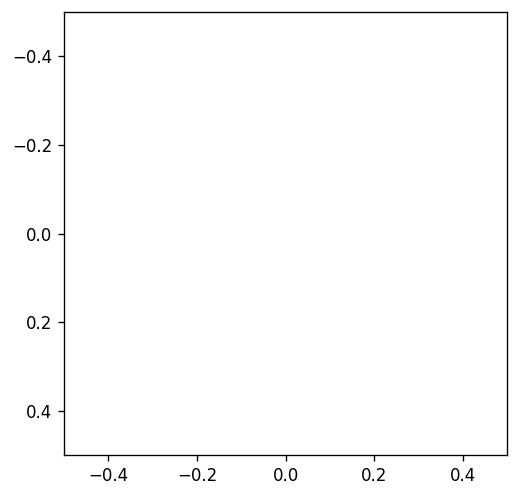

In [92]:
plt.imshow(monthly["tmin"].to_numpy()[0])

In [6]:
var = ["prcp", "tmin"]
coords = (-80.4, 44.6)
crs = "epsg:3542"
dates = ("2000-01-01", "2006-12-31")
annual = daymet.get_bycoords(coords, dates, variables=var, time_scale="annual")

In [7]:
annual

,prcp (mm/day),tmin (degrees C)
2000-07-01,1171.680054,3.099945
2001-07-02,1028.219971,4.437726
2002-07-02,779.099976,4.107041
2003-07-02,1053.780029,2.143781
2004-07-01,980.460022,2.576740
2005-07-02,882.250000,3.276712
2006-07-02,1040.109985,4.265480
